# Principal Component Analysis
Principal Component Analysis (PCA) is one of the most commonly used Unsupervised Machine Learning algorithms. It attempts to find the principal axes and order these axes using variance of the data. Unlike other learning algorithms we've covered, the goal of PCA is to identify relationships in data and not to predict data. We'll use the visuzalization from [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb) to look closer at what principal axes are and how PCA works. 

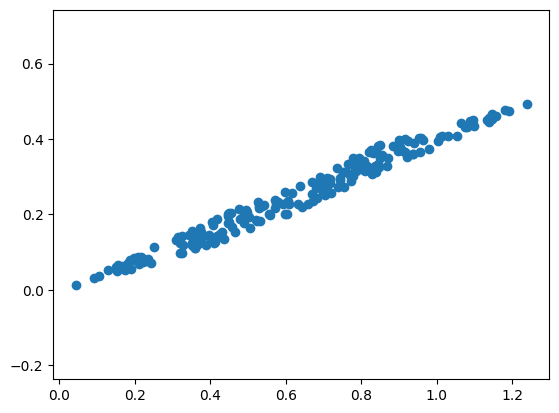

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plot some random data
X = np.dot(np.random.rand(2, 2), np.random.rand(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

We can see the data has a generally linear relationship. We can think of the principal axes as vectors that run along the data.

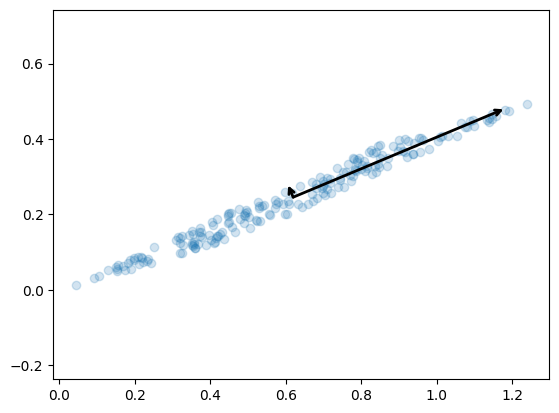

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These principal axes give us some idea about the relationship between the x and y features. It also gives us a way to "rank" the principal axes in order of importance. To understand how, think about collapsing all of the data on to only one of the principal axes -- which would lose more information about the data's pattern? 

This idea of collapsing the data onto the best principal axes fuels the use of PCA to reduce the dimension of data. Let's use PCA to reduce the dimensionality of the wine dataset and compare it to just using the first 2 features of the wine dataset. 

## Functions to graph SVCs

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# import the functions needed from sklearn
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def make_meshgrid(x, y, h=.05):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    print('This may take 30-60 seconds to run. Please be patient.')
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def create_graph(clf_2feature, feature_names, X_train, y_train):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear SVC ')
    # Set-up grid for plotting
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf_2feature, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel(f'Wine feature: {feature_names[1]}')
    ax.set_xlabel(f'Wine feature: {feature_names[0]}')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    #ax.legend()

    plt.show()

def run_svm(data, target, type):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

    model = SVC(kernel='linear')
    clf = model.fit(X_train, y_train)

    # Make predictions
    predictions = clf.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f'SVM Accuracy on {type} Data: {round(accuracy, 3)*100}%')

    return [clf, X_train, y_train]

## Running SVC on PCA-transformed data and non-PCA-transformed data

In [14]:
wine = load_wine()

pca_2 = PCA(n_components=2)
pca_transformed_data = pca_2.fit_transform(wine.data)
pca_feature_names = ['pc_0', 'pc_1']

clf_base, X_train_base, y_train_base = run_svm(wine.data[:, :2], wine.target, 'Untransformed')
clf_trans, X_train_trans, y_train_trans = run_svm(pca_transformed_data, wine.target, 'PCA-Transformed')

SVM Accuracy on Untransformed Data: 83.3%
SVM Accuracy on PCA-Transformed Data: 75.0%


This may take 30-60 seconds to run. Please be patient.


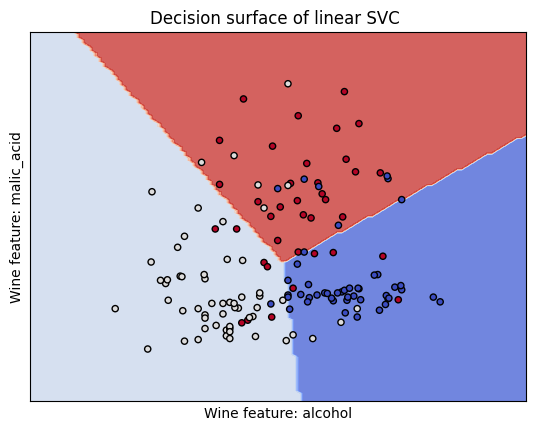

In [15]:
create_graph(clf_base, wine.feature_names[0:2], X_train_base, y_train_base)

This may take 30-60 seconds to run. Please be patient.


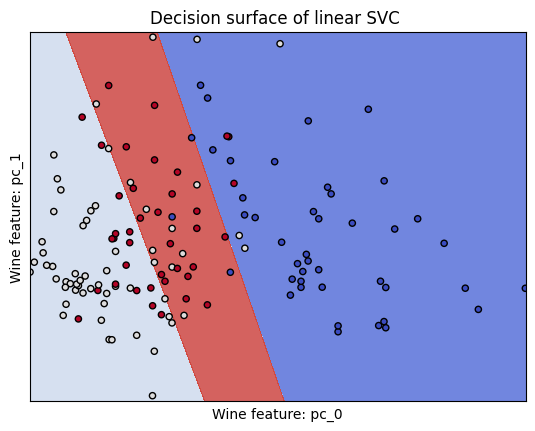

In [16]:
create_graph(clf_trans, pca_feature_names, X_train_trans, y_train_trans)

Notice how the boundaries change between the two models since the data is transformed. **This may or may not improve the accuracy of your model!** We will discuss dimensionality reduction more after we learn how to validate models we are working with.